## <center>Compare Foxtrot and PyFAI -Intensity shift-</center>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d


In [2]:
def extract_numpy_from_files(pyFAI_raw_path, trans_pyFAI_path, foxtrot_path):
    #load files
    #pyFAI files:
    pyFAI_raw = np.loadtxt(pyFAI_raw_path, comments='#')
    trans_pyFAI = np.loadtxt(trans_pyFAI_path)
    trans_pyFAI_mean = np.mean(trans_pyFAI)
    #Foxtrot file
    Foxtrot = np.loadtxt(foxtrot_path, skiprows=21)

    #Extract intensity and q from numpy array
     # Extract PyFAI
    q_pyFAI_raw = pyFAI_raw[:, 0]  # First column (q_iso)
    i_pyFAI_raw = pyFAI_raw[:, 1]  # Second column (i_iso)
    #correction transmission
    i_pyFAI_trans_corr = i_pyFAI_raw/trans_pyFAI_mean 
    #Extract Foxtrot
    #Foxtrot_raw = np.loadtxt(Foxtrot_raw_path, skiprows=21)
    q_Foxtrot = Foxtrot[:, 0]  # First column (q_iso)
    i_Foxtrot = Foxtrot[:, 1]  # Second column (i_iso)


    return i_pyFAI_raw, i_pyFAI_trans_corr, q_pyFAI_raw, i_Foxtrot, q_Foxtrot

In [3]:
def plot_data(i_pyFAI_raw, i_pyFAI_trans_corr, q_pyFAI_raw, i_Foxtrot, q_Foxtrot):
    fig,ax = plt.subplots()
    ax.loglog(q_pyFAI_raw,i_pyFAI_raw, color='b',label='Raw PyFAI')
    ax.loglog(q_pyFAI_raw,i_pyFAI_trans_corr, color='r',label='Transmission corr PyFAI')
    ax.loglog(q_Foxtrot,i_Foxtrot, color='g',label='Foxtrot')
    ax.set_xlabel('q')
    ax.set_ylabel('i')
    ax.legend()

- Comparaison kin_21

In [4]:
pyFAI_raw_path = 'D:/SWING/to_do/kin_21_au_500tes_done/S_C_2_SF_4_P_1_05068/integration/rodriguez_05068_2024-10-12_12-17-56_integration_mean.txt'
trans_pyFAI_path = 'D:/SWING/to_do/kin_21_au_500tes_done/S_C_2_SF_4_P_1_05068/transmission/rodriguez_05068_2024-10-12_12-17-56_transmission.txt'
foxtrot_path =  'D:/SWING/to_do/kin_21_au_500tes_done/S_C_2_SF_4_P_1_05068/integration/Ave_85_S_C_2_SF_4_P_1_05068AzInt_Px.dat'

In [5]:
i_pyFAI_raw, i_pyFAI_trans_corr, q_pyFAI_raw, i_Foxtrot, q_Foxtrot = extract_numpy_from_files(pyFAI_raw_path, trans_pyFAI_path, foxtrot_path);

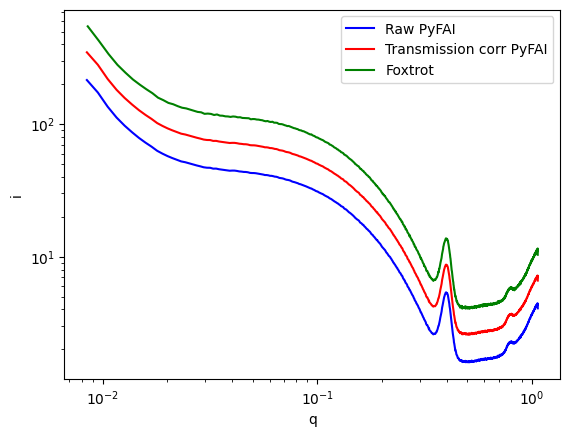

In [6]:
plot_data(i_pyFAI_raw, i_pyFAI_trans_corr, q_pyFAI_raw, i_Foxtrot, q_Foxtrot)

- Determine ratios between pyFAI and Foxtrot

In [7]:
# Create an interpolation function
f = interp1d(q_Foxtrot, i_Foxtrot, bounds_error=False, fill_value='extrapolate')
# Interpolate i_Foxtrot to match the shape of i_pyFAI_raw
i_Foxtrot_interpolated = f(q_pyFAI_raw)
ratio1 = i_pyFAI_raw / i_Foxtrot_interpolated
mean_ratio1 = np.mean(ratio1[1:-1])
sigma_ratio1 = np.std(ratio1[1:-1])
print(mean_ratio1)
print(sigma_ratio1)

0.3915423598157525
0.0011558209893559233


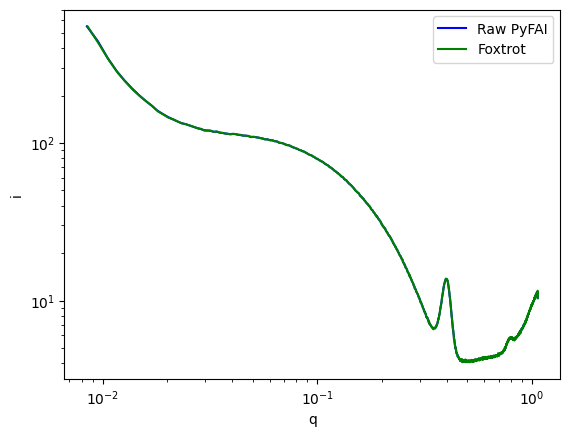

In [8]:
fig,ax = plt.subplots()
ax.loglog(q_pyFAI_raw,i_pyFAI_raw/mean_ratio1, color='b',label='Raw PyFAI')

ax.loglog(q_Foxtrot,i_Foxtrot, color='g',label='Foxtrot')
ax.set_xlabel('q')
ax.set_ylabel('i')
ax.legend()

In [21]:
averagemi8b = np.array([5.0986e-8,5.0998e-8,5.0928e-8,5.0902e-8,5.0943e-8,5.0937e-8])
averagemi8b = np.mean(averagemi8b)
print(averagemi8b)
print(1/averagemi8b)

5.094899999999999e-08
19627470.60786277


- Comparaison kin_11

In [12]:
pyFAI_raw_path =  'D:/SWING/to_do/kin_11_ag_55deg/S_C_2_SF_2_P_31_02399/integration/rodriguez_02399_2024-10-11_17-10-50_integration_mean.txt'
trans_pyFAI_path  = 'D:/SWING/to_do/kin_11_ag_55deg/S_C_2_SF_2_P_31_02399/transmission/rodriguez_02399_2024-10-11_17-10-50_transmission.txt'
foxtrot_path =  'D:/SWING/to_do/kin_11_ag_55deg/S_C_2_SF_2_P_31_02399/integration/Ave_14_S_C_2_SF_2_P_31_02399AzInt_Px.dat'

In [14]:
i_pyFAI_raw, i_pyFAI_trans_corr, q_pyFAI_raw, i_Foxtrot, q_Foxtrot = extract_numpy_from_files(pyFAI_raw_path, trans_pyFAI_path, foxtrot_path);

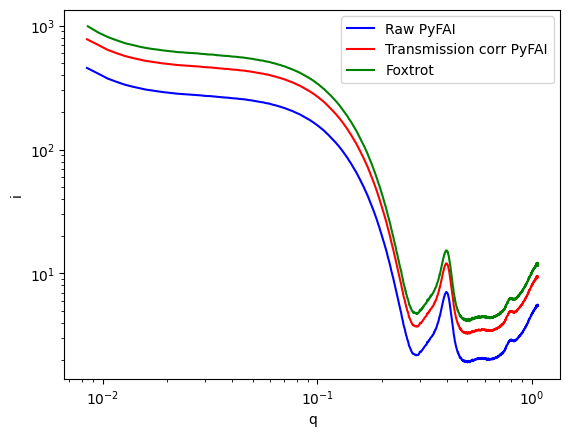

In [15]:
plot_data(i_pyFAI_raw, i_pyFAI_trans_corr, q_pyFAI_raw, i_Foxtrot, q_Foxtrot)

In [16]:
# Create an interpolation function
f = interp1d(q_Foxtrot, i_Foxtrot, bounds_error=False, fill_value='extrapolate')
# Interpolate i_Foxtrot to match the shape of i_pyFAI_raw
i_Foxtrot_interpolated = f(q_pyFAI_raw)
ratio1 = i_pyFAI_raw / i_Foxtrot_interpolated
mean_ratio1 = np.mean(ratio1[1:-1])
sigma_ratio1 = np.std(ratio1[1:-1])
print(mean_ratio1)
print(sigma_ratio1)

0.4607077407888947
0.001127147734479191


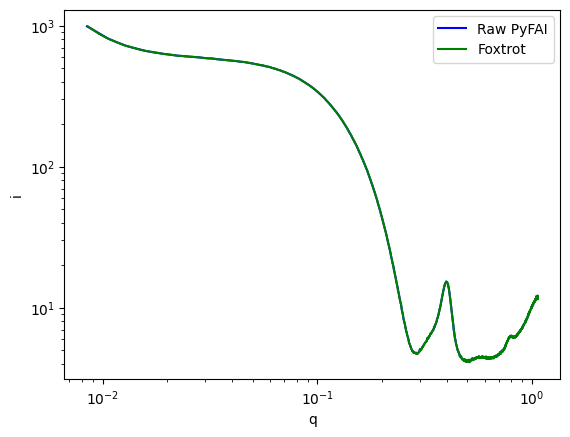

In [17]:
fig,ax = plt.subplots()
ax.loglog(q_pyFAI_raw,i_pyFAI_raw/mean_ratio1, color='b',label='Raw PyFAI')

ax.loglog(q_Foxtrot,i_Foxtrot, color='g',label='Foxtrot')
ax.set_xlabel('q')
ax.set_ylabel('i')
ax.legend()

In [19]:
averagemi8b = np.array([5.9888e-8,5.9901e-8,5.9894e-8,6.0006e-8,5.9997e-8,6.0009e-8])
averagemi8b = np.mean(averagemi8b)
print(averagemi8b)

5.994916666666666e-08


In [9]:
# def compare_plots(sample_raw_path,transmissions_path,Foxtrot_raw_path):#,scale_raw,scale_trans):
#     #load files
#     sample_raw = np.loadtxt(sample_raw_path, comments='#')
#     transmission = np.loadtxt(transmissions_path)
#     transmission = np.mean(transmission)
#     ###########pyFAI
#     # Extract the columns
#     q_raw = sample_raw[:, 0]  # First column (q_iso)
#     i_raw = sample_raw[:, 1]  # Second column (i_iso)
#     #correction transmission
#     i_transmission_corr = i_raw/transmission
#     ###########Foxtrot
#     Foxtrot_raw = np.loadtxt(Foxtrot_raw_path, skiprows=21)
#     q_Foxtrot_raw = Foxtrot_raw[:, 0]  # First column (q_iso)
#     i_Foxtrot_raw = Foxtrot_raw[:, 1]  # Second column (i_iso)
#     ###########Plot All

#     fig,ax = plt.subplots()
#     ax.loglog(q_raw,i_raw, color='b',label='Raw PyFAI')
#     ax.loglog(q_raw,i_transmission_corr, color='r',label='Transmission corr PyFAI')
#     ax.loglog(q_Foxtrot_raw,i_Foxtrot_raw, color='g',label='Raw Foxtrot')
#     ax.set_xlabel('q')
#     ax.set_ylabel('i')
#     ax.legend()



#     # fig,ax = plt.subplots()
#     # ax.loglog(q_raw,i_raw*scale_raw, color='b',label='Raw PyFAI')
#     # ax.loglog(q_raw,i_transmission_corr*scale_trans, color='r',label='Transmission corr PyFAI')
#     # ax.loglog(q_Foxtrot_raw,i_Foxtrot_raw, color='g',label='Raw Foxtrot')
#     # ax.set_xlabel('q')
#     # ax.set_ylabel('i')
#     # ax.legend()


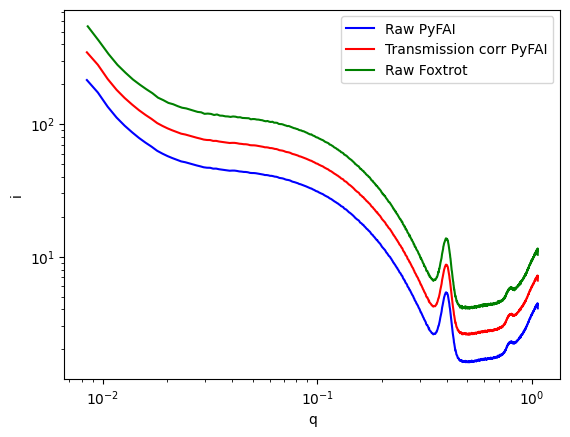

In [10]:
# sample_raw_path = 'D:/SWING/to_do/kin_21_au_500tes_done/S_C_2_SF_4_P_1_05068/integration/rodriguez_05068_2024-10-12_12-17-56_integration_mean.txt'
# transmissions_path = 'D:/SWING/to_do/kin_21_au_500tes_done/S_C_2_SF_4_P_1_05068/transmission/rodriguez_05068_2024-10-12_12-17-56_transmission.txt'
# Foxtrot_raw_path =  'D:/SWING/to_do/kin_21_au_500tes_done/S_C_2_SF_4_P_1_05068/integration/Ave_85_S_C_2_SF_4_P_1_05068AzInt_Px.dat'


# mi8_b = 5.0902e-8
# scale_raw =mi8_b* 5e7 # 02.5
# scale_trans = 1.6

# compare_plots(sample_raw_path,transmissions_path,Foxtrot_raw_path)#,scale_raw,scale_trans)



In [ ]:
# sample_raw_path = 'D:/SWING/to_do/kin_11_ag_55deg/S_C_2_SF_2_P_31_02399/integration/rodriguez_02399_2024-10-11_17-10-50_integration_mean.txt'
# transmissions_path = 'D:/SWING/to_do/kin_11_ag_55deg/S_C_2_SF_2_P_31_02399/transmission/rodriguez_02399_2024-10-11_17-10-50_transmission.txt'
# Foxtrot_raw_path =  'D:/SWING/to_do/kin_11_ag_55deg/S_C_2_SF_2_P_31_02399/integration/Ave_14_S_C_2_SF_2_P_31_02399AzInt_Px.dat'
# mi8_b = 6e-8
# mi5 = 1.2497e-9
# scale_raw = mi8_b* 5e7
# scale_trans = 1.3


# compare_plots(sample_raw_path,transmissions_path,Foxtrot_raw_path,scale_raw,scale_trans)

In [ ]:
# sample_corr_transmission = np.vstack((q_raw, i_transmission_corr)).T 
# header = "q_iso   i_iso"
# np.savetxt('D:/SWING/to_do/kin_21_au_500tes_done/S_C_2_SF_4_P_1_05068/integration/div_transmission.txt',sample_corr_transmission,header = header , fmt='%.6f')